# Arbre de décision

### 4DS1

# Algorithme des arbres de décision pour  un problème de classification

Nous allons travailler avec le jeu de données breast_cancer,pour plus d'informations cliquer sur ce lien https://goo.gl/U2Uwz2

In [ ]:
from sklearn.datasets import load_breast_cancer

## Chargement des bibiliothèque nécessaires

## Vérifier la version de sklearn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#### Extraire de `df` : les observations dans un tableau 2D `X` et les classes dans un tableau 1D `y`

In [ ]:
df = load_breast_cancer()
df
print(df.keys())
print(df.target_names)

X = df.data
y = df.target

print(X.shape,' ',y.shape)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
['malignant' 'benign']
(569, 30)   (569,)


#### Diviser l'ensemble des observations X et l'ensemble de classes Y, chacun en deux sous-ensembles :
- un sous-ensemble d'apprentissage : 70% de l'ensemble initial
- un sous-ensemble de test : 30% de l'ensemble initial


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=3)# random_state=some_number pour garantir que votre split sera toujours le même

#### Afficher la description de la classe __`DecisionTreeClassifier`__

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier?


#### Créer une instance  instancier __`dt`__  de la classe  __`DecisionTreeClassifier`__ en fixant à __zéro__  __`random_state`__. Garder l'indice de Gini comme __`criterion`__ par defaut.

In [ ]:
dt = DecisionTreeClassifier(random_state=0)

#### Entrainer le modèle __`dt`__ sur les sous-ensembles d'apprentissage (observations et classes)

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

Interprétation

In [ ]:
print('Le train score est :', dt.score(X_train, y_train))
print('Le test score est :', dt.score(X_test, y_test))

Le train score est : 1.0
Le test score est : 0.9532163742690059


#### Tracer la matrice de confusion de __`dt`__

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = dt.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[[ 57   5]
 [  3 106]]


### Afficher le __`classification_report`__ de __`dt`__

In [ ]:
from sklearn.metrics import classification_report
y_pred = dt.predict(X_test)

print(classification_report(y_test, y_pred, digits=8, target_names= df.target_names ))

              precision    recall  f1-score   support

   malignant  0.95000000 0.91935484 0.93442623        62
      benign  0.95495495 0.97247706 0.96363636       109

    accuracy                      0.95321637       171
   macro avg  0.95247748 0.94591595 0.94903130       171
weighted avg  0.95315842 0.95321637 0.95304555       171



### Afficher l'importance de chaque variable

In [ ]:
dt.feature_importances_ #voir les indices d'importance/discriminante != indice de gini 0 : non utilisé

array([0.00713262, 0.03566308, 0.        , 0.        , 0.        ,
       0.00713262, 0.01577406, 0.01634382, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01388715, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05521608, 0.        , 0.7191022 , 0.        ,
       0.        , 0.        , 0.12974838, 0.        , 0.        ])

#### Afficher l'arbre de décision

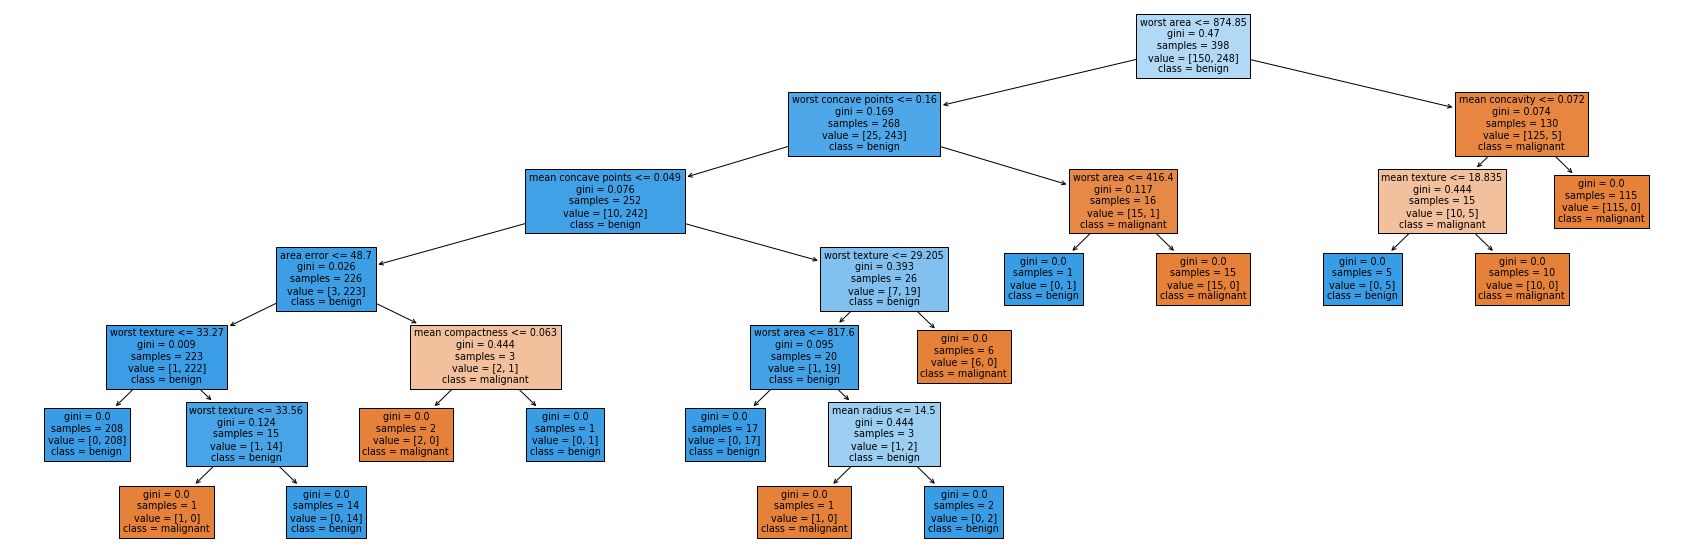

In [ ]:
names = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
         'mean smoothness', 'mean compactness', 'mean concavity',
         'mean concave points', 'mean symmetry', 'mean fractal dimension',
         'radius error', 'texture error', 'perimeter error', 'area error',
         'smoothness error', 'compactness error', 'concavity error',
         'concave points error', 'symmetry error',
         'fractal dimension error', 'worst radius', 'worst texture',
         'worst perimeter', 'worst area', 'worst smoothness',
         'worst compactness', 'worst concavity', 'worst concave points',
         'worst symmetry', 'worst fractal dimension']

from sklearn.tree import plot_tree
plt.figure(figsize=(30,10))
plot_tree(dt, feature_names= names, class_names=df.target_names, filled=True)
plt.show()

#### Afficher l'arbre sous forme de régles de décision

In [ ]:
from sklearn.tree import export_text
print(export_text(dt, feature_names=names))

|--- worst area <= 874.85
|   |--- worst concave points <= 0.16
|   |   |--- mean concave points <= 0.05
|   |   |   |--- area error <= 48.70
|   |   |   |   |--- worst texture <= 33.27
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- worst texture >  33.27
|   |   |   |   |   |--- worst texture <= 33.56
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- worst texture >  33.56
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- area error >  48.70
|   |   |   |   |--- mean compactness <= 0.06
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- mean compactness >  0.06
|   |   |   |   |   |--- class: 1
|   |   |--- mean concave points >  0.05
|   |   |   |--- worst texture <= 29.20
|   |   |   |   |--- worst area <= 817.60
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- worst area >  817.60
|   |   |   |   |   |--- mean radius <= 14.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- mean radius >  14.50
|   |   |   |   |   |   |--- class: 1


#### Que pensez-vous de la complexité de l'arbre ?


In [ ]:
#trop complexé

#### Règlage des paramètres

In [ ]:
from sklearn.model_selection import GridSearchCV


#### Afficher les meilleures valeurs des hyperparamètres réglés

In [ ]:
param_grid = {'criterion': ['gini', 'entropy'],
             'max_depth': np.arange(1,10),
             'splitter':['best', 'random'],
             'min_samples_split':np.arange(1,10)}

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)

C:\Users\nadhir\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nadhir\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nadhir\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\nadhir\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 231, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\nadhir\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 4, 'splitter': 'random'}


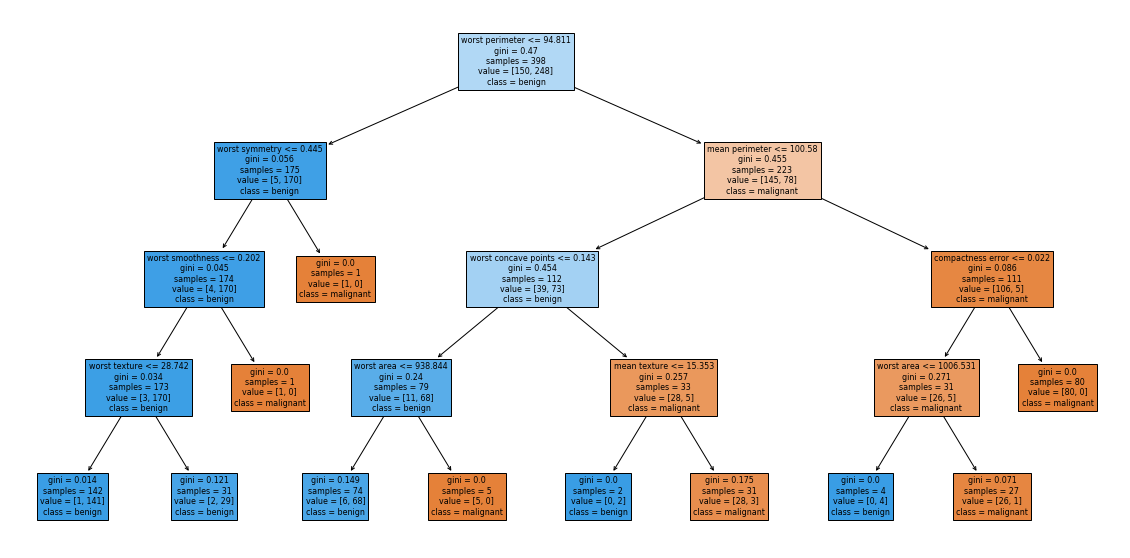

In [ ]:
final_model0 = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=4,min_samples_split=4,splitter='random')
final_model0.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(final_model0, feature_names= names, class_names=df.target_names, filled=True)
plt.show()

In [ ]:
print( 'le train_score=',final_model0.score(X_train, y_train))
print( 'le test_score=',final_model0.score(X_test, y_test))

le train_score= 0.9673366834170855
le test_score= 0.9532163742690059


In [ ]:
param_grid = {'criterion': ['gini', 'entropy'],
             'max_depth': np.arange(1,10)}

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)

{'criterion': 'entropy', 'max_depth': 2}


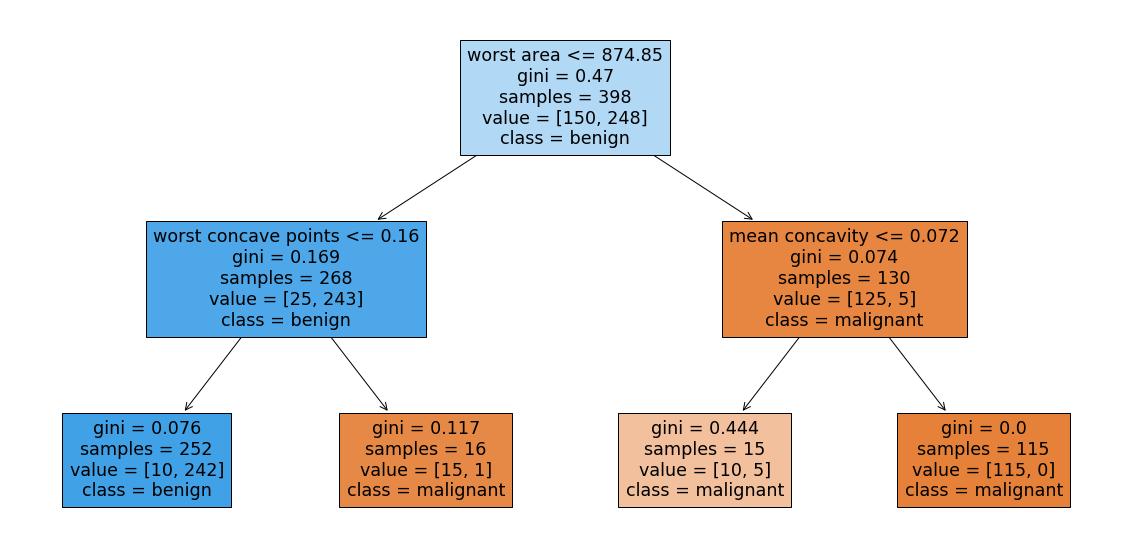

In [ ]:
final_model = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=2)
final_model.fit(X_train, y_train)

from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(final_model, feature_names= names, class_names=df.target_names, filled=True)
plt.show()

#### Evaluation

In [ ]:
print( 'le train_score=',final_model.score(X_train, y_train))
print( 'le test_score=',final_model.score(X_test, y_test))

le train_score= 0.9597989949748744
le test_score= 0.935672514619883


In [ ]:
param_grid = {'criterion': ['gini', 'entropy'],
             'max_depth': np.arange(1,10)}

from sklearn.model_selection import RandomizedSearchCV

grid = RandomizedSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)

{'max_depth': 2, 'criterion': 'entropy'}


#### Comparer la performance de ce modèle dont les hyperparamètres ont été réglés avec le modèle sans réglage d'hyperparamètres

In [ ]:
#final_model0 lègerement moins compliqué avec la meme precision
#final_model moins compliqué avec legere diminution de la precision